In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss

# Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

In [7]:
df = pd.read_csv('credit_score.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,33.309240,10.764996,14.00000,24.000000,33.000000,42.000000,56.0000
annual_income,100000.0,50505.123439,38299.422075,7005.93000,19342.972500,36999.705000,71683.470000,179987.2800
monthly_inhand_salary,100000.0,4198.771620,3187.494355,303.64542,1626.761700,3096.378400,5961.745000,15204.6340
total_emi_per_month,100000.0,107.043617,130.035096,0.00000,29.197023,66.403020,146.827450,3776.0000
num_bank_accounts,100000.0,5.368800,2.593279,0.00000,3.000000,5.000000,7.000000,11.0000
num_credit_card,100000.0,5.533640,2.067073,0.00000,4.000000,5.000000,7.000000,11.0000
interest_rate,100000.0,14.532080,8.741330,1.00000,7.000000,13.000000,20.000000,34.0000
num_of_loan,100000.0,3.532880,2.446356,0.00000,2.000000,3.000000,5.000000,9.0000
delay_from_due_date,100000.0,21.068780,14.860104,-5.00000,10.000000,18.000000,28.000000,67.0000
num_of_delayed_payment,100000.0,13.334050,6.271409,0.00000,9.000000,14.000000,18.000000,28.0000


In [5]:
df.describe(include='object')

,id,customer_id,month,name,ssn,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,8,10139,12500,15,6261,3,2,6
top,0x1602,CUS_0xd40,January,Langep,821-00-0265,Lawyer,['No Loan'],Standard,Yes,Low_spent_Small_value_payments
freq,1,8,12500,48,8,7096,11408,45848,59432,27588


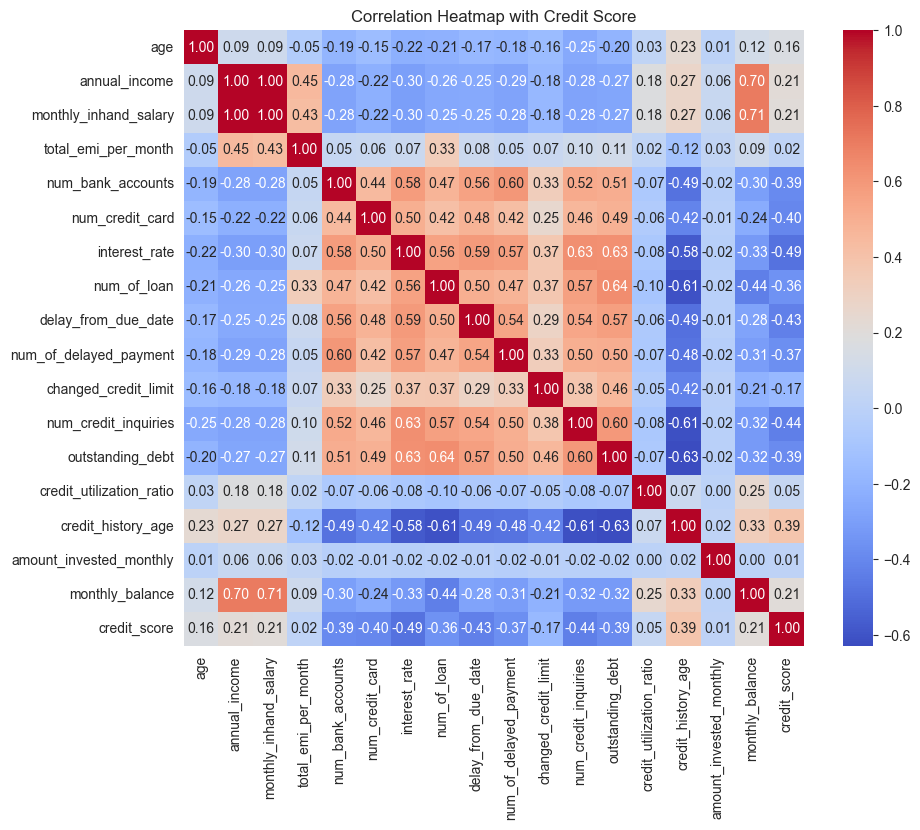

In [8]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap with Credit Score')
plt.show()

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_2149/3322443238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='deep')
/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_2149/3322443238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='deep')
/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_2149/3322443238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y=col, data=df, palette='deep')
/var/folders/qt/

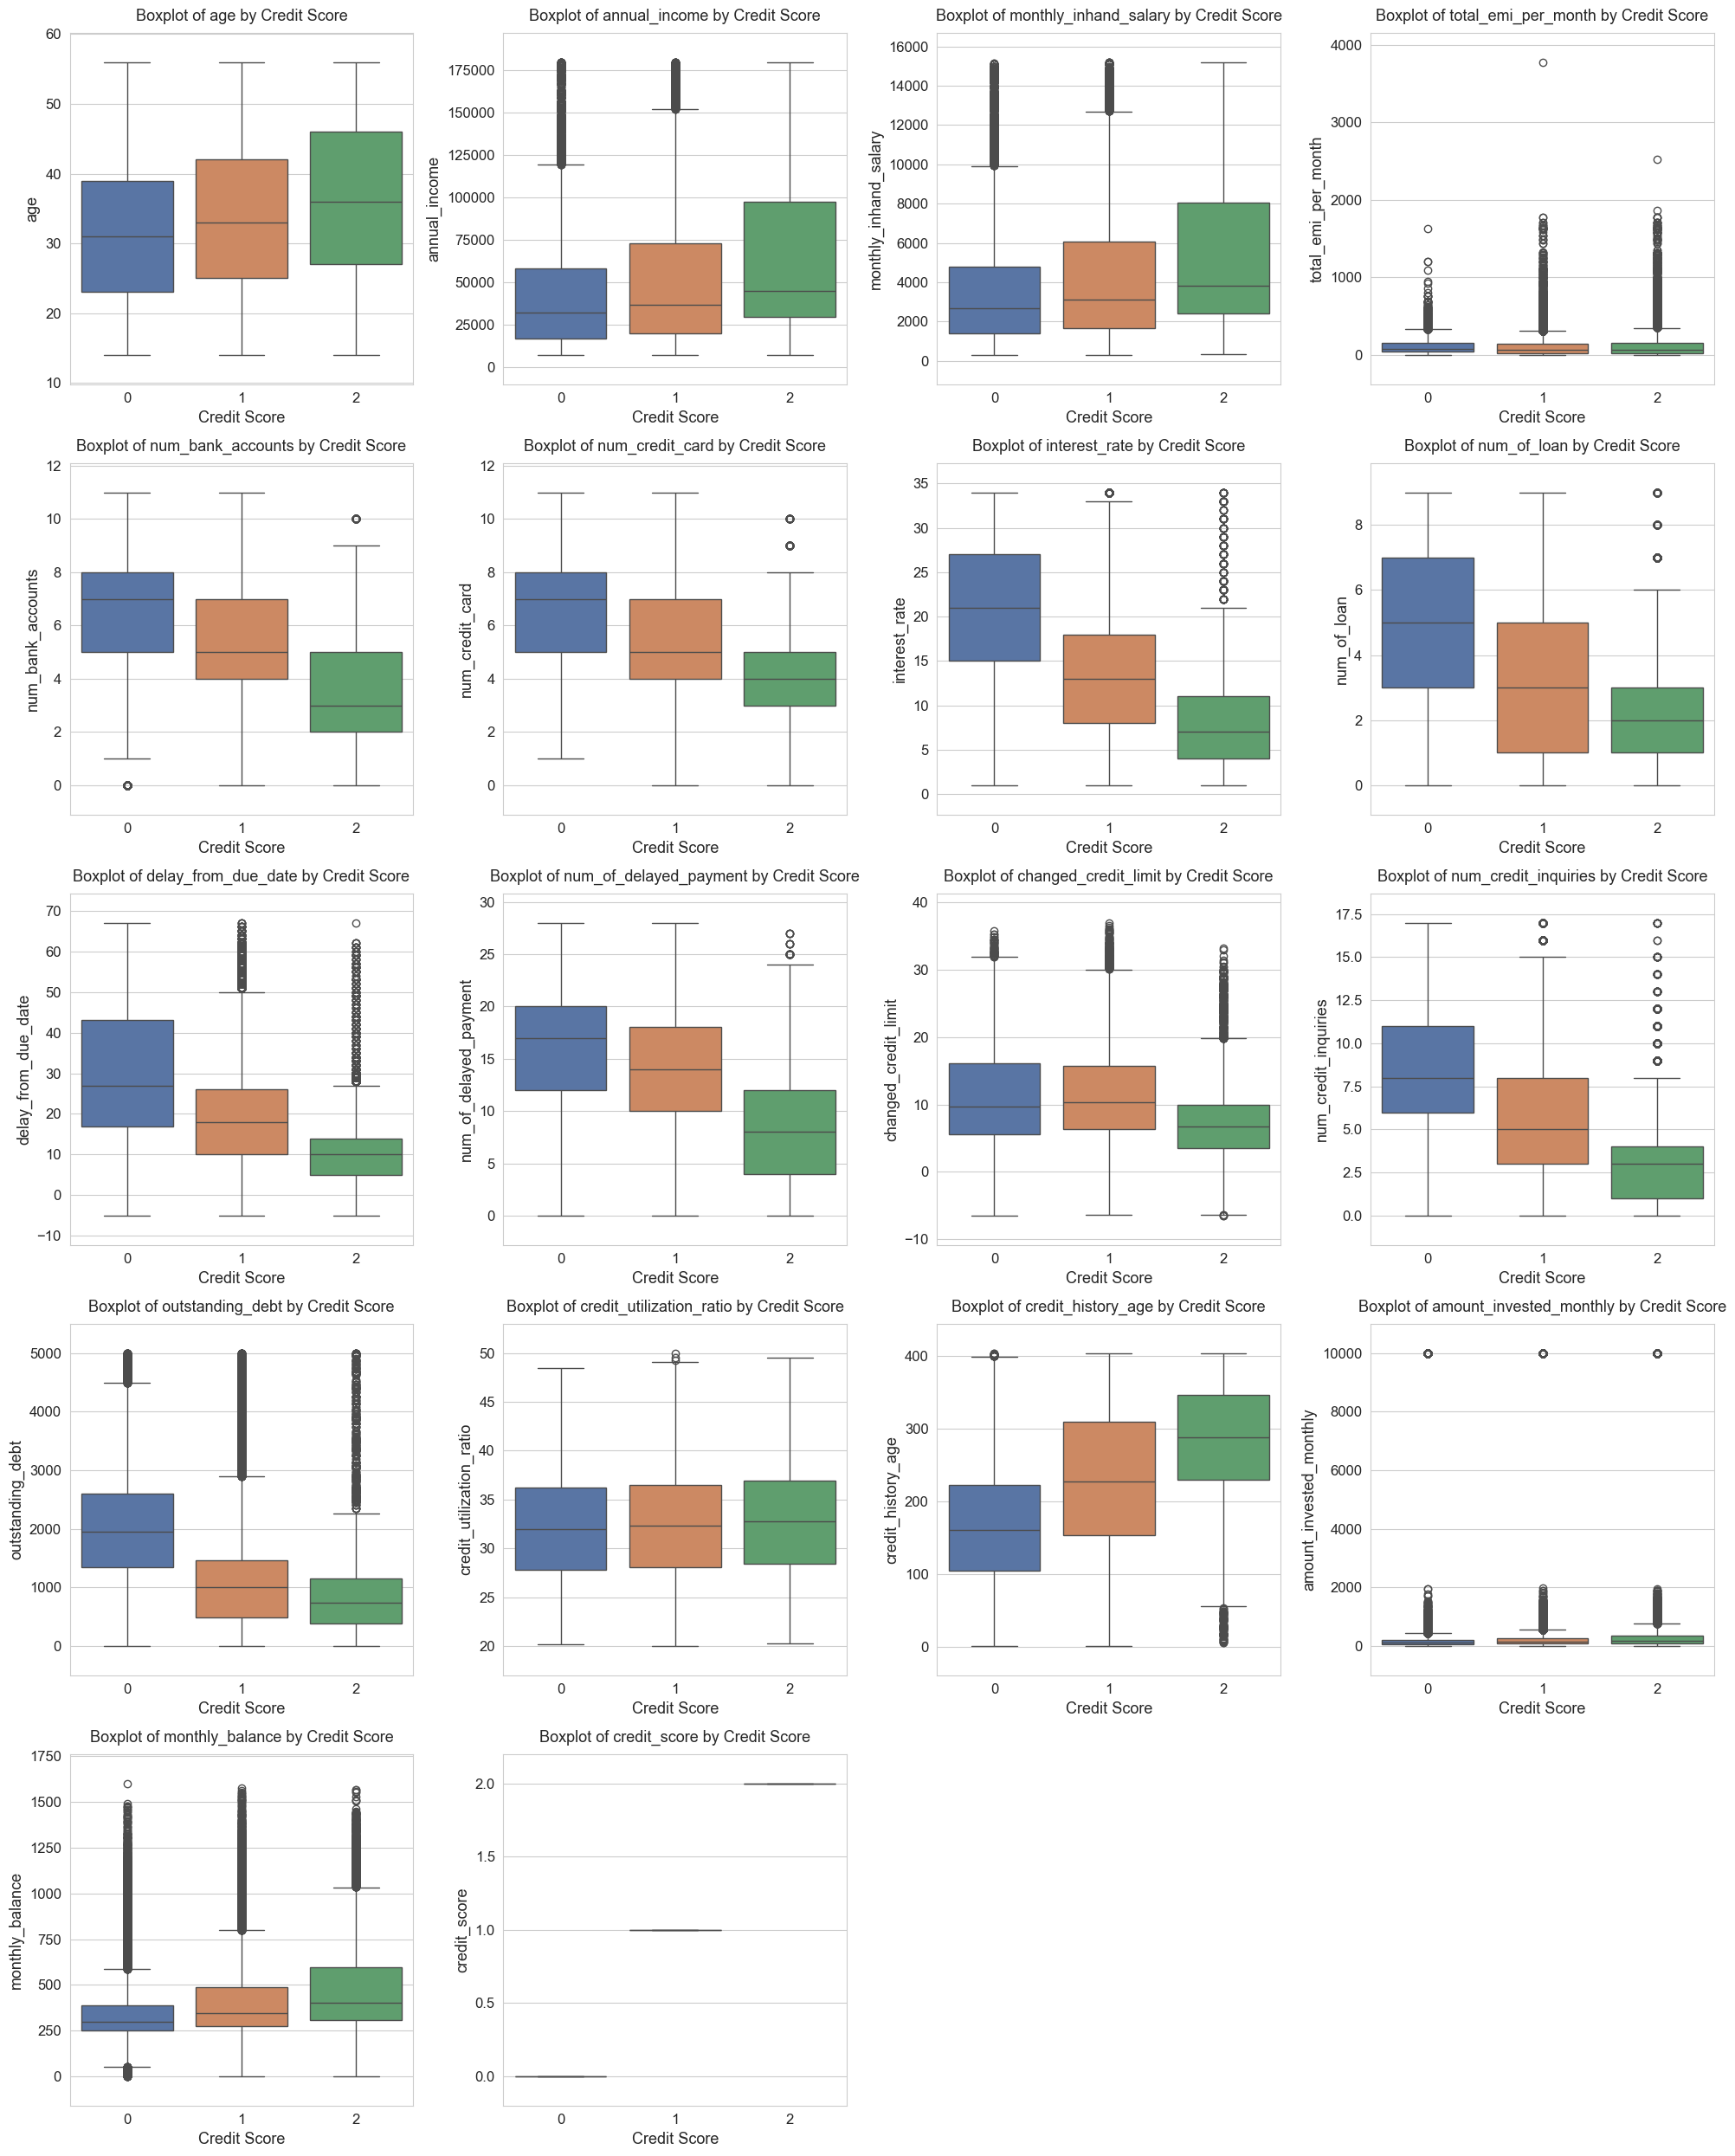

In [10]:
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='credit_score', y=col, data=df, palette='deep')
    plt.title(f'Boxplot of {col} by Credit Score', fontsize=13, pad=10)
    plt.xlabel('Credit Score', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
                df[col].max() + (df[col].max() - df[col].min()) * 0.1)
    
plt.subplots_adjust(wspace=0.4, hspace=0.7)

plt.tight_layout()
plt.show()

In [11]:
df.groupby('customer_id')['payment_of_min_amount'].nunique().value_counts()

payment_of_min_amount
1    12500
Name: count, dtype: int64

The results indicate that each customer_id has a single, consistent value in the payment_of_min_amount column across all months in the dataset. This means each customer is either marked as 'Yes' or 'No' for every month, with no variation in this field over time.

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_2149/2192907853.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y=feature, estimator='mean', ci=None)


<Figure size 1200x600 with 0 Axes>

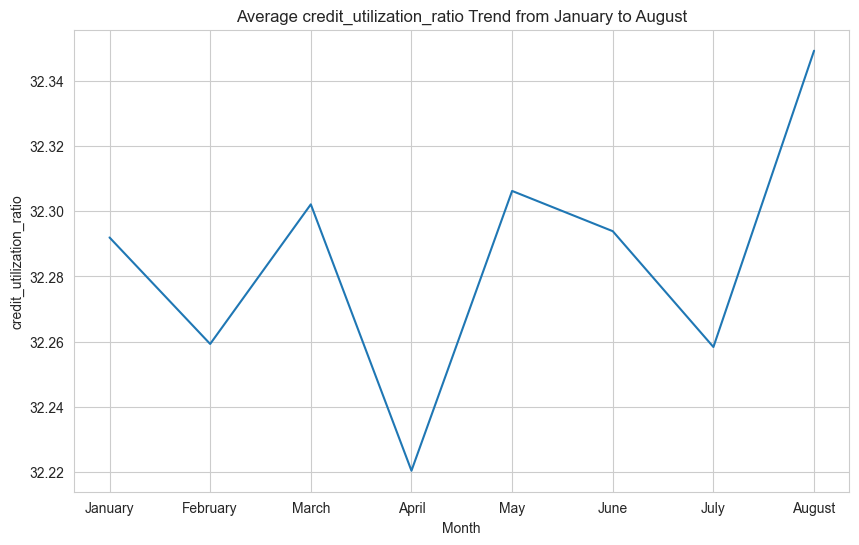

/var/folders/qt/m1d2k3qd4_z368vlhrz0r7w80000gn/T/ipykernel_2149/2192907853.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y=feature, estimator='mean', ci=None)


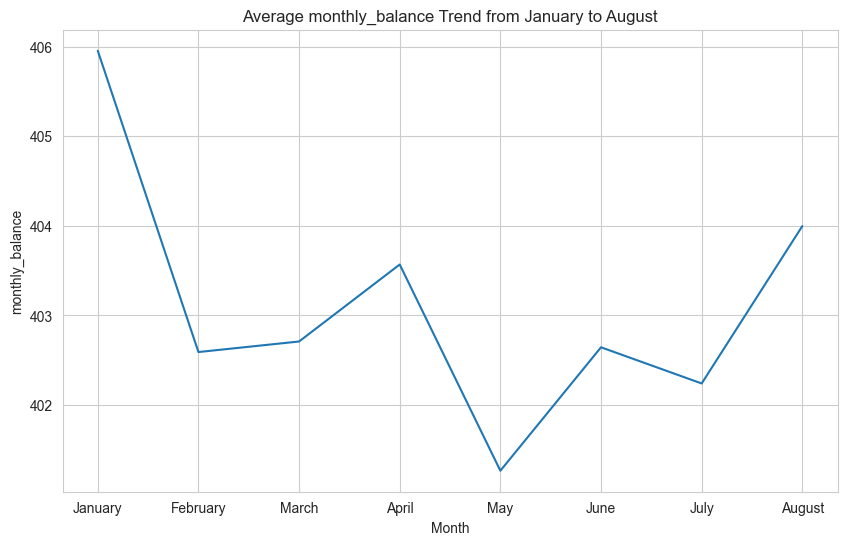

In [13]:
plt.figure(figsize=(12,6))

monthly_features = ['credit_utilization_ratio', 'monthly_balance']

for feature in monthly_features:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x='month', y=feature, estimator='mean', ci=None)
    plt.title(f'Average {feature} Trend from January to August')
    plt.xlabel('Month')
    plt.ylabel(feature)
    plt.show()



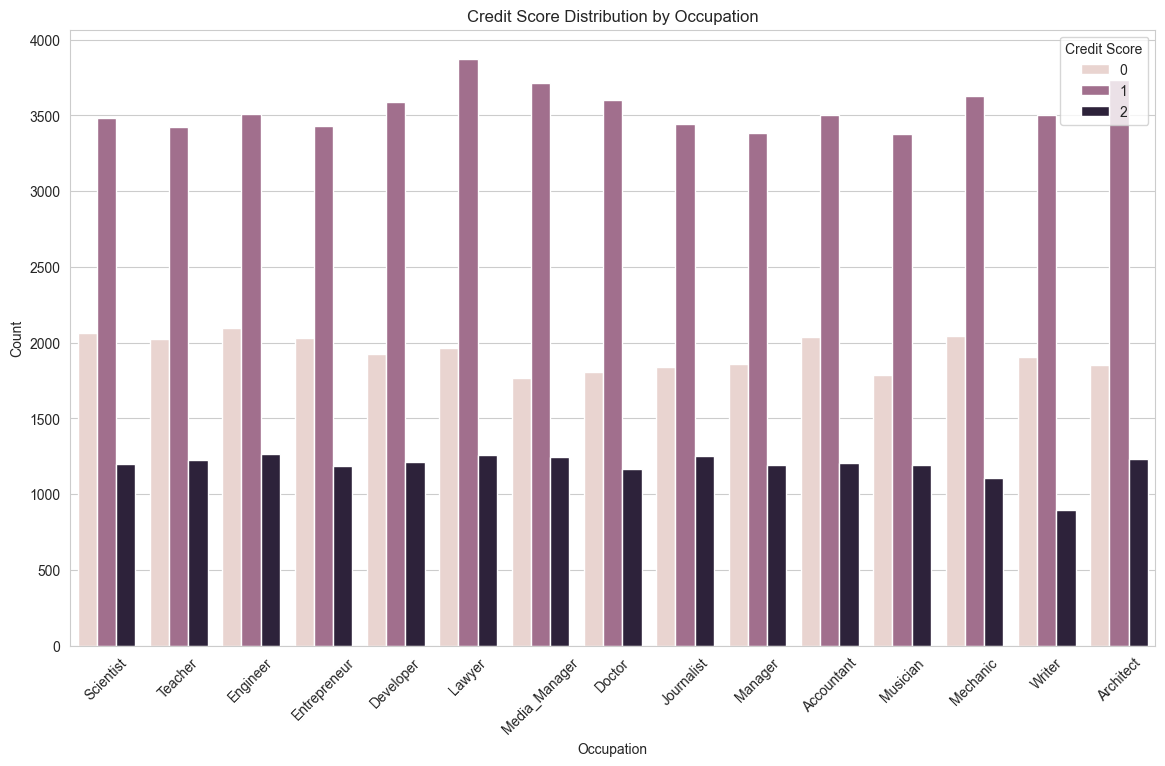

In [14]:
# Distribution of Credit Score across Different Occupations
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='occupation', hue='credit_score')
plt.title('Credit Score Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.show()

In [15]:
df['credit_score'].value_counts(normalize = True)

credit_score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64

In [16]:
df.type_of_loan.unique()

array(["['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan']",
       "['Credit-Builder Loan']",
       "['Auto Loan', 'Auto Loan', 'Not Specified']", ...,
       "['Home Equity Loan', 'Auto Loan', 'Auto Loan', 'Auto Loan']",
       "['Payday Loan', 'Student Loan', 'Mortgage Loan', 'Not Specified']",
       "['Personal Loan', 'Auto Loan', 'Mortgage Loan', 'Student Loan', 'Student Loan']"],
      dtype=object)

In [17]:
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

for loan_type in unique_loan_types:
    cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()

    df[cleaned_loan_type] = df['type_of_loan'].apply(lambda x: x.count(loan_type))

In [18]:
df = df.drop(['id', 'customer_id', 'name', 'ssn', 'type_of_loan'], axis=1)